In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
gender_col = {'Female':0,'Male':1}
data['Gender'] = data['Gender'].map(gender_col)

In [7]:
geo_col = {'France':0,'Germany':1,'Spain':2}
data['Geography'] = data['Geography'].map(geo_col)

In [8]:
data['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [9]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

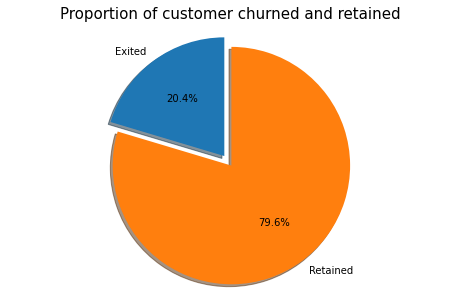

In [10]:
import matplotlib.pyplot as plt
labels = 'Exited','Retained'
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
exp = (0,.1)
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=exp, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

In [11]:
# class0 = data[data.iloc[:,m-1]==0]
# class1 = data[data.iloc[:,m-1]==1]

In [12]:
data = data.drop(['RowNumber','CustomerId','Surname'],1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


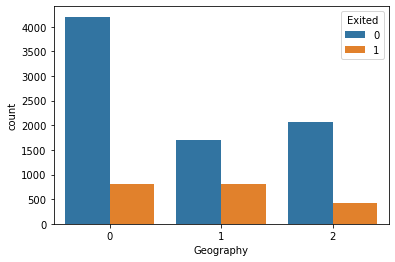

In [13]:
import seaborn as sns
sns.countplot(x='Geography',hue='Exited',data = data)

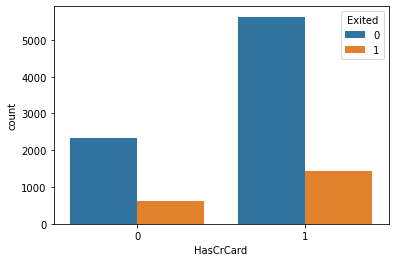

In [14]:
sns.countplot(x="HasCrCard",hue='Exited',data=data)

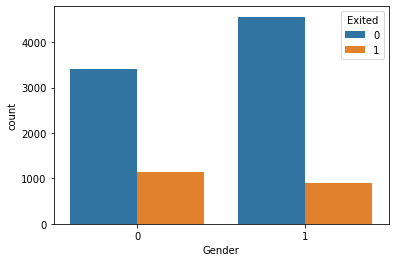

In [15]:
sns.countplot(x='Gender',hue='Exited',data=data)

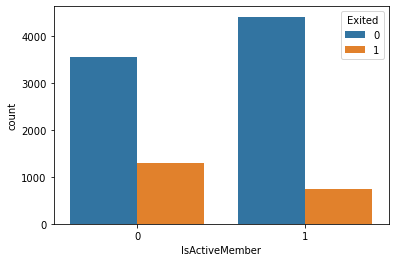

In [16]:
sns.countplot(x='IsActiveMember',hue='Exited',data=data)

In [17]:
def xuly(data):
    for i in range(data.shape[1]):
        data.iloc[:,i] = data.iloc[:,i]/max(data.iloc[:,i])
    return data

In [18]:
data = xuly(data)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.728235,0.0,0.0,0.456522,0.2,0.000000,0.25,1.0,1.0,0.506763,1.0
1,0.715294,1.0,0.0,0.445652,0.1,0.334031,0.25,0.0,1.0,0.562734,0.0
2,0.590588,0.0,0.0,0.456522,0.8,0.636357,0.75,1.0,0.0,0.569679,1.0
3,0.822353,0.0,0.0,0.423913,0.1,0.000000,0.50,0.0,0.0,0.469151,0.0
4,1.000000,1.0,0.0,0.467391,0.2,0.500246,0.25,1.0,1.0,0.395435,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.907059,0.0,1.0,0.423913,0.5,0.000000,0.50,1.0,0.0,0.481371,0.0
9996,0.607059,0.0,1.0,0.380435,1.0,0.228657,0.25,1.0,1.0,0.508518,0.0
9997,0.834118,0.0,0.0,0.391304,0.7,0.000000,0.25,0.0,1.0,0.210436,1.0
9998,0.908235,0.5,1.0,0.456522,0.3,0.299226,0.50,1.0,0.0,0.464460,1.0


In [19]:
data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.765328,0.373150,0.545700,0.423063,0.501280,0.304848,0.382550,0.70550,0.515100,0.500470,0.203700
std,0.113710,0.413765,0.497932,0.113998,0.289217,0.248696,0.145414,0.45584,0.499797,0.287563,0.402769
min,0.411765,0.000000,0.000000,0.195652,0.000000,0.000000,0.250000,0.00000,0.000000,0.000058,0.000000
25%,0.687059,0.000000,0.000000,0.347826,0.300000,0.000000,0.250000,0.00000,0.000000,0.255020,0.000000
50%,0.767059,0.000000,1.000000,0.402174,0.500000,0.387402,0.250000,1.00000,1.000000,0.500988,0.000000
75%,0.844706,0.500000,1.000000,0.478261,0.700000,0.508749,0.500000,1.00000,1.000000,0.746969,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [20]:
n,m = data.shape
n,m

(10000, 11)

In [21]:
X = data.iloc[:,0:m-1].values
Y = data.iloc[:,m-1].values

In [22]:
X=X.reshape(-1,m-1)
Y=Y.reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2)

In [24]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [25]:
def predict(x,theta):
    y_pre = np.dot(x,theta)
    return sigmoid(y_pre)

In [26]:
def cost_funciton(x,y,theta):
    epsilon = 1e-5
    predicta = predict(x,theta)
    cost_fun1 = y * np.log(predicta)
    cost_fun2 =(1-y)*np.log(1-predicta)
    cost = cost_fun1 + cost_fun2
    return (-1/n) * np.sum(cost)

In [27]:
theta = np.array([.1]*m).reshape(-1,1)

In [28]:
one = np.ones((x_train.shape[0],1))
x_train = np.concatenate((one,x_train),1)

In [29]:
cost_funciton(x_train,y_train,theta)

0.7359325981458477

In [30]:
def classification(arr):
    if arr >= .5:
        return 1
    else:
        return 0

In [31]:
one = np.ones((x_test.shape[0],1))
x_test = np.concatenate((one,x_test),1)

In [32]:
def accuary(label,y_test):
    it = 0
    for i in range(len(label)):
        if y_test[i] == label[i]:
            it +=1
    return (it/len(label))

In [33]:
def train(x,y,x_test,y_test,theta,learning_rate,iters):
    cost_history = list()
    for i in range(iters):
        y_pr = predict(x,theta)
        theta = theta - learning_rate*(np.dot(x.T,(y_pr-y)))/n
        cost = cost_funciton(x,y,theta)
        cost_history.append(cost)
    arr = predict(x_test,theta)
    label = list()
    for i in arr:
        label.append(classification(i))
    score = accuary(label,y_test)
    return score,cost_history,theta

In [34]:
learning_rates = [0.001,0.005,0.05,.1,.5]
models = {}
for i in learning_rates:
    models[i] = train(x_train,y_train,x_test,y_test,theta,learning_rate=i,iters=1000)

In [35]:
cost = list()
theta = []
for key,val in models.items():
    for i in learning_rates:
        if key == i:
            print(f'learning_rate : {i} accuray : {val[0]}')
            cost.append(val[1])
            theta.append(val[-1])

learning_rate : 0.001 accuray : 0.7985
learning_rate : 0.005 accuray : 0.7985
learning_rate : 0.05 accuray : 0.7985
learning_rate : 0.1 accuray : 0.799
learning_rate : 0.5 accuray : 0.81


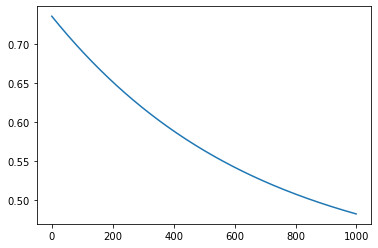

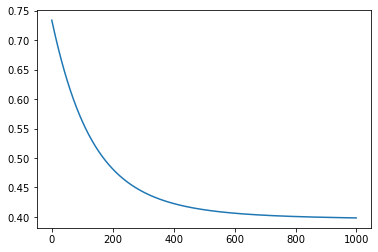

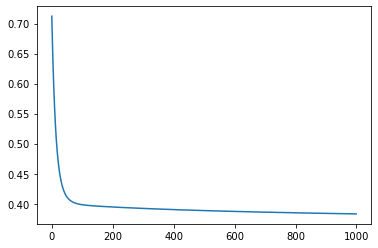

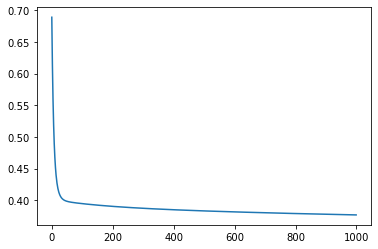

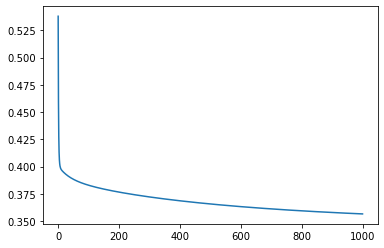

In [36]:
for i in cost:
    plt.plot(i)
    plt.show()

In [37]:
hill = [1,0.834118,0.0,0.0,0.391304,0.7,0.000000,0.25,0.0,1.0,0.210436]
hill = np.array(hill)

In [38]:
pr = []
for i in theta:
    pr.append(classification(predict(hill,theta=i)))
print(pr)

[0, 0, 0, 0, 0]


In [39]:
theta[1].shape

(11, 1)

In [40]:
hill.shape

(11,)